# **Week 2 : Linear Classifiers and Logistic Regression**

In this week we shall explore our first useful machine learning model, namely the linear classifier. The resources for learning about the same can be found [here](https://github.com/Ihsoj-Mahos/WiDS-Week2/tree/master/resources). The objective for this assignment will be to design a linear classifier in order to distinguish a labelled dataset of red and blue points in the $\mathbb{R}^2$ space. In particular, this assignment deals with the binary classification problem.


<img src="https://stanford.edu/~shervine/teaching/cs-221/illustrations/linear-classifier.png?79f320ac5ba3e9d5dae2c573007dbfb6"
 style="float:center;width:200px;height:200px;">

# **Importing Libraries**

In [ ]:
# Import Libraries here

import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib

# **Dataset Generation**

First, we will generate a dataset for which the classification problem needs to be solved. In this dataset, each element will be a vector and each label will a either 0 or 1, where 0 corresponds to red and 1 corresponds to blue. You can observe that the data can't be partitioned into two halves exactly. You don't have to edit the cells below.

The data is in the form of a $2 \times n$ matrix, where each column has a pair of $(x,y)$ values. The data is stored in the variable `data`, whereas the labels, a $1 \times n$ matrix, is stored in the variable `labels` and corresponds to the label {$0,1$} of each point in the data.

Note that you don't even have to look at our data generation process, it's fine if you do, but don't waste time on it :)

In [ ]:
# Random number generator
rng = np.random.default_rng(seed = 1)

y_positive = np.abs(rng.normal(0,1,5000)*20)
labels = rng.binomial(1,0.95,5000)
labels_positive = labels
x_positive = rng.normal(0,1,5000)*20

y_negative = -1*np.abs(rng.normal(0,1,5000)*20)
labels_negative = 1-labels_positive
x_negative = rng.normal(0,1,5000)*20

In [ ]:
x = np.concatenate((x_positive, x_negative))
y = np.concatenate((y_positive, y_negative))
labels = np.concatenate((labels_positive, labels_negative))
data_and_labels = np.vstack((x,y,labels))

In [ ]:
shuffled = data_and_labels[:, np.random.permutation(data_and_labels.shape[1])]
x = shuffled[:1,:]
y = shuffled[1:2,:]
labels = shuffled[2:3,:]

In [ ]:
theta = np.pi/6

rot_matrix = np.array([[np.cos(theta),-1*np.sin(theta)],[np.sin(theta), np.cos(theta)]])

In [ ]:
data = shuffled[:2,:]
data = rot_matrix@data
X_plot = data[:1,:]
y_plot = data[1:2,:] + 5

X = np.vstack((X_plot,y_plot))
y = labels
print(X.shape[0])


2


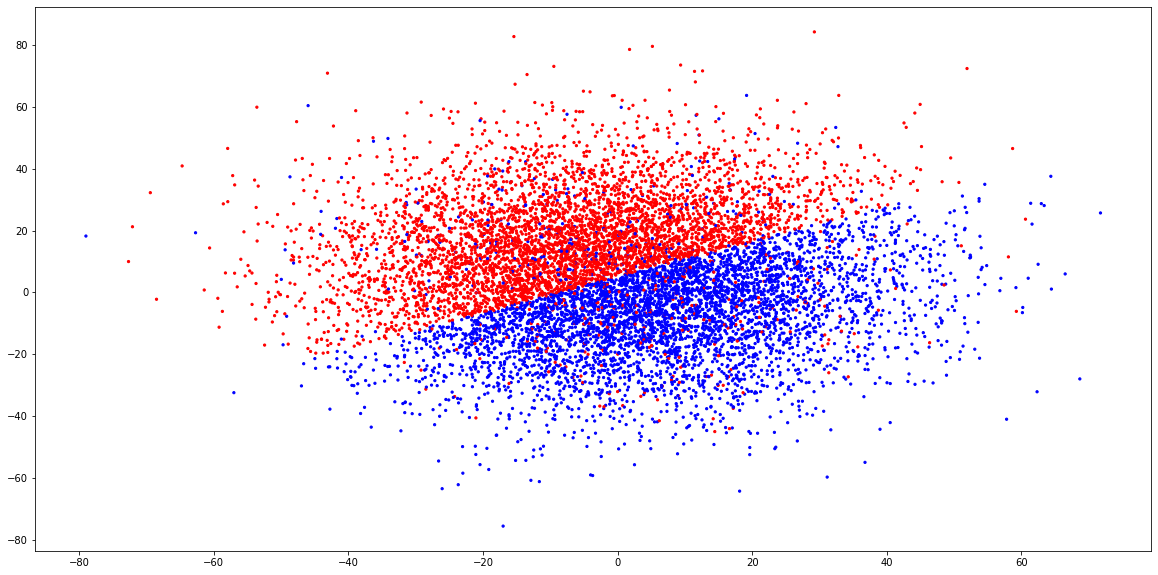

In [ ]:
fig = plt.figure(figsize=(20,10))

colors = ['blue','red']

plt.scatter(X_plot, y_plot, c=labels, cmap=matplotlib.colors.ListedColormap(colors), s=5)
plt.show()

# **Binary Classifier**

Now that we have the dataset variable loaded, let's construct the binary classifier using logistic regression. That is we need to estimate the parameters W and b where, 

\begin{equation}
z = Wx + b \\ 
a = \sigma(z) = \frac{1}{1+e^{-z}}\\ 
L(a, y) = -(y.log(a) + (1-y).log(1-a))
\end{equation}

In machine-learning terminology, the function $\sigma(z)$ is called an [activation function](https://en.wikipedia.org/wiki/Activation_function). Activation functions will be covered next week :)

# **Gradient Descent**

Here, you have to implement the gradient descent algorithm for the binary classifier and return the parameters W, b. 

**Bonus (Optional)** : Plot the loss function as a function of the number of iterations.

In [ ]:
def calculate_a(num):
  return 1/(1+math.exp(-num))

def grad_descent(X, y, num_iter = 1000, lr = 0.01) : 

    # INSERT CODE BELOW
    a = np.vectorize(calculate_a)
    W=np.zeros([1,2])
    size=X.shape[1]
    b=0
    i=0
    # f = lambda x: 1/(1+math.exp(-x))
    # f = np.vectorize(f)

    while i<num_iter:
      z_array=np.dot(W,X)+b
      # a_array = np.array(list(map(calculate_a, z_array[0,:])))
      a_array=a(z_array)
      a_y_array=a_array-y
      deravative=np.dot(X,np.transpose(a_y_array))
      deravative=deravative/size
      W=W-lr*np.transpose(deravative)
      b=b-lr*np.sum(a_y_array)/size
      i=i+1
    # INSERT CODE ABOVE

    return (W, b)

descent=grad_descent(X, y, 10000, 0.01)
print(descent)

(array([[-0.08894531,  0.15143283]]), -0.7509075710004346)


# **Plotting the decision boundary**

Given the labelled dataset and the parameters W, b, plot the decision boundary along with the dataset (with the appropriate coloring).

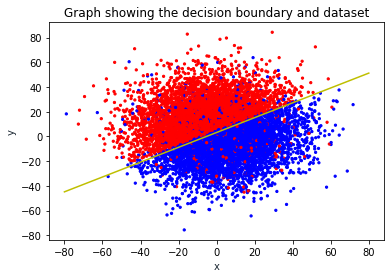

In [ ]:
def plot(X, y, W, b) : 

    # INSERT CODE ABOVE
    x = np.linspace(-80,80,100)
    y = -W[0][0]*x/W[0][1]-b/W[0][1]
    plt.plot(x, y, 'y')
    plt.scatter(X_plot, y_plot, c=labels, cmap=matplotlib.colors.ListedColormap(colors), s=5)
    plt.title('Graph showing the decision boundary and dataset')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.show()
    # INSERT CODE BELOW

    return 
plot(X,y, descent[0], descent[1])

# **Accuracy**

Now, let us calculate the accuracy, i.e. percentage of points classified correctly by the classifier given as :

\begin{equation}
\text{accuracy} = 100 * \frac{\text{Correctly classified points}}{\text{Total Number of Points}}
\end{equation}


For this purpose, we will define two functions, for predicting the labels and accuracy.

In [ ]:
def sign_of_z(num):
    if num>0:
      return 1
    elif num<0:
      return 0

def predict(X, y, W, b) : 
    '''
    Inputs 
    -> X : A numpy array of vectors denoting positions of points
    -> y : A numpy array containing labels
    -> W, b : Parameters for the model

    Returns : 
    -> A numpy array containing predicted labels for the dataset using the classifier model.
    -> Make sure that the dimensions of the input y and the output "preds" are the same.
    '''

    # INSERT CODE BELOW
    z_array=np.dot(W, X)+b
    signs = np.vectorize(sign_of_z)
    preds=signs(z_array)
    # INSERT CODE ABOVE

    assert(preds.shape == y.shape)
    return preds

preds=predict(X,y, descent[0],descent[1])
print(preds)

[[1 1 1 ... 1 0 0]]


For the accuracy function, we need to return the accuracy as described by the equation above

In [ ]:
def accuracy(X, y, preds) : 
    '''
    Inputs 
    -> X : A numpy array of vectors denoting positions of points
    -> y : A numpy array containing labels
    -> preds : Predicted labels by the model

    Returns : 
    -> A floating point number denoting the % accuracy of the model
    '''

    # INSERT CODE BELOW
    count=np.sum(preds == y)
    count=count/preds.shape[1]*100
    # INSERT CODE ABOVE
    return count

print(accuracy(X,y,preds))

92.08


# **Combining the functions**

Now, we are done with all the elements we need. Let's combine them into a program. (Feel free to edit the number of iterations to observe how the line changes)

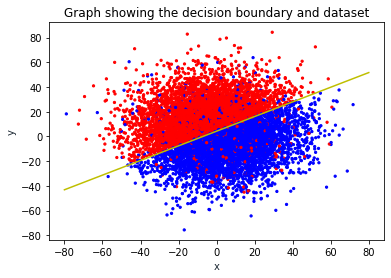

The accuracy of the model is :  93.60000000000001  %


In [ ]:
# The number of iterations
num_iter = 2000

W, b = grad_descent(X, y, num_iter)

plot(X, y, W, b)
predictions = predict(X, y, W, b)
result = accuracy(X, y, predictions)

print(f'The accuracy of the model is : ', result, ' %')

# **Bonus (Optional)**

We need to examine how well the model does depending upon the number of iterations, size of input data. So you have to plot the accuracy of the model as the number of iterations varies. This part of the assignment is open-ended and you can choose the sampling of the number of iterations, you can try varying the size of the input data, maybe even a combination of the two! We have not provided a template for this part so you can choose the plotting scheme.

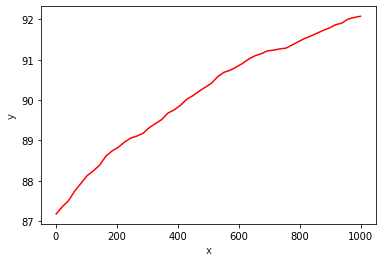

In [ ]:
# BONUS PART
def plot2(X, y) : 

    # INSERT CODE ABOVE
    x = np.linspace(1,1000,50)
    z=np.zeros([1,50])
    for i in range(0,50):
      graddescent=grad_descent(X,y,x[i],0.01)
      pred=predict(X,y, graddescent[0],graddescent[1])
      z[0][i]= accuracy(X,y,pred)
    plt.plot(x, z[0,:], 'r')
    plt.xlabel('x', color='#1C2833')
    plt.ylabel('y', color='#1C2833')
    plt.show()
    # INSERT CODE BELOW

    return 

plot2(X,y)

# **Submission Instructions**

Upload this notebook on your github classroom repository by the name Week1.ipynb